In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv("../../turnover.csv", engine = "python", encoding = "ISO-8859-1")

In [4]:
df1.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [5]:
df1.shape

(1129, 16)

In [6]:
df1.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

In [7]:
df1.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

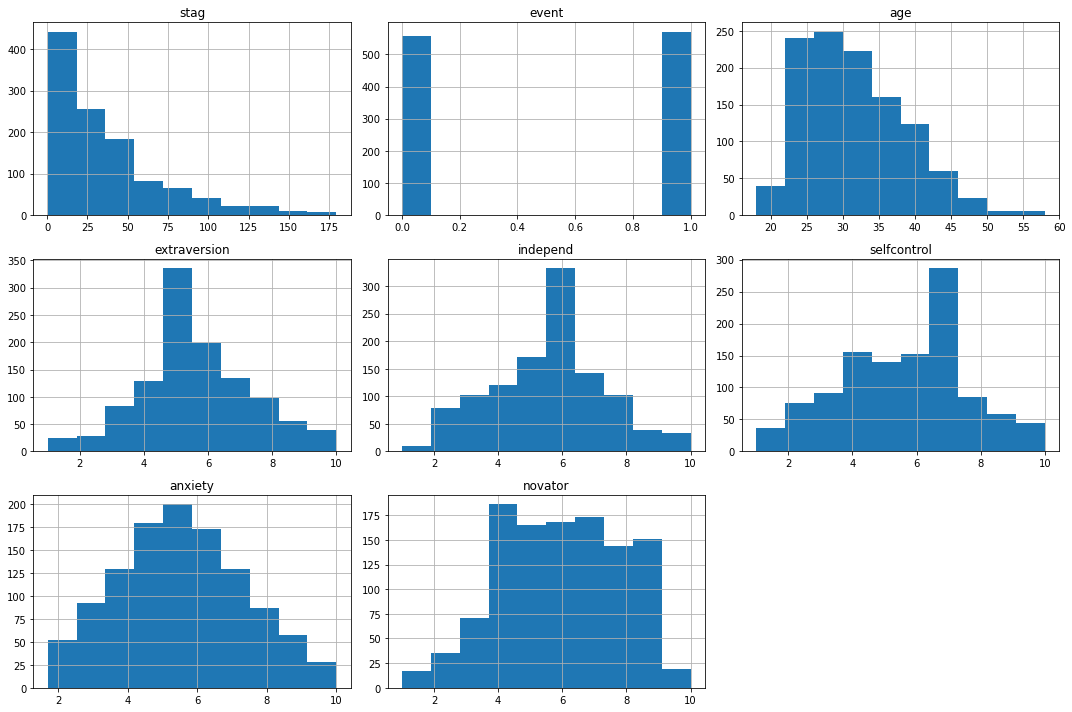

In [8]:
df1.hist(figsize=(15, 10))
plt.tight_layout()  # To avoid overlap of histograms
plt.show()

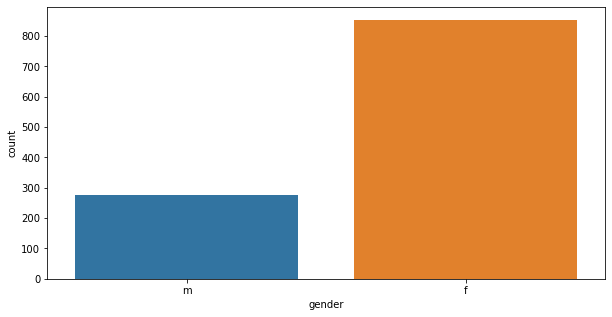

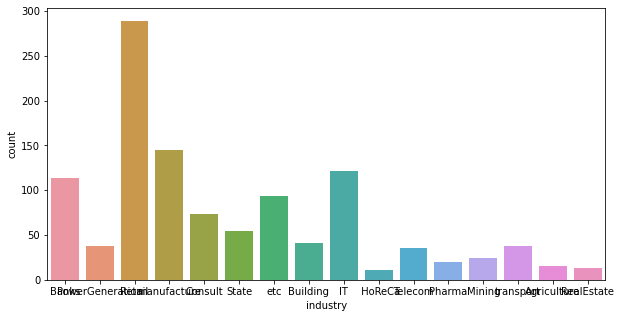

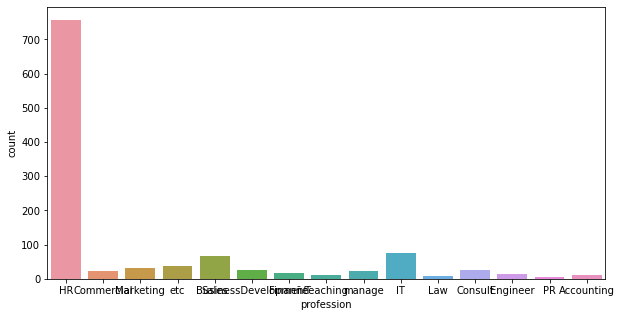

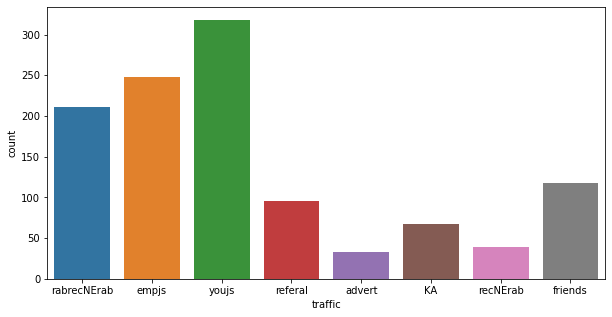

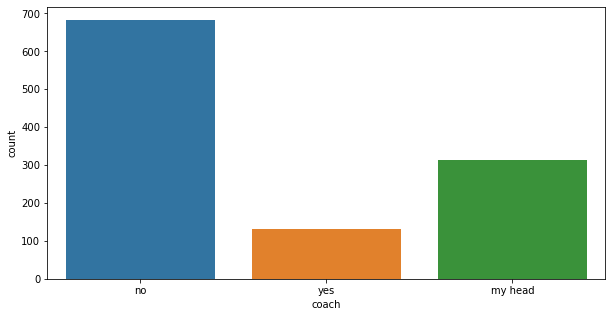

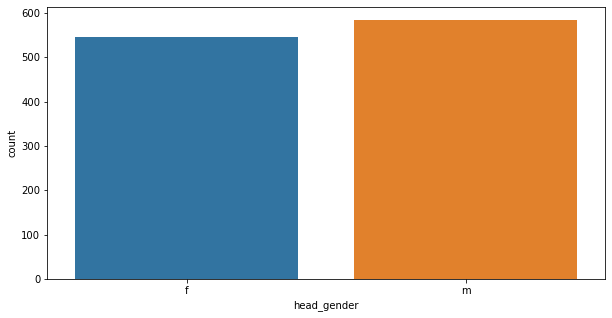

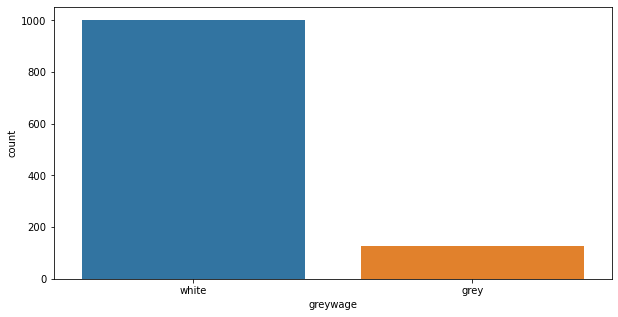

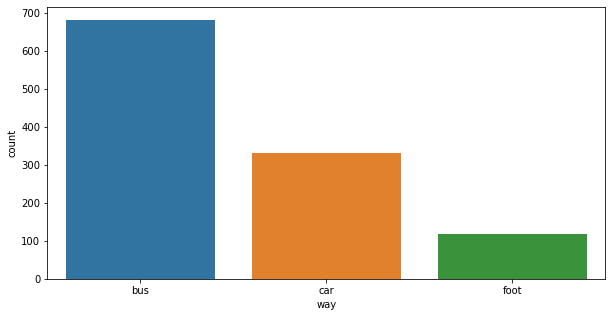

In [9]:
for col in df1.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df1, x=col)
    plt.show()

In [14]:
##Create years tenured variable instead of stag

In [10]:
df1['years_tenured'] = df1['stag'] / 12

In [11]:
df1.drop('stag', axis = 1, inplace = True)

In [12]:
df1.head()

,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,years_tenured
0,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.585900
1,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,1.913758
2,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,1.327858
3,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,1.327858
4,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.700890


In [15]:
##Create a binary coach variable (replaces "my head" with yes)

In [13]:
df1['coach'] = df1['coach'].replace('my head', 'yes')
df1['coach'] = df1['coach'].map({'yes': 1, 'no': 0})
df1.head()

,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,years_tenured
0,1,m,35.0,Banks,HR,rabrecNErab,0,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.585900
1,1,m,33.0,Banks,HR,empjs,0,m,white,bus,6.2,4.1,5.7,7.1,8.3,1.913758
2,1,f,35.0,PowerGeneration,HR,rabrecNErab,0,m,white,bus,6.2,6.2,2.6,4.8,8.3,1.327858
3,1,f,35.0,PowerGeneration,HR,rabrecNErab,0,m,white,bus,5.4,7.6,4.9,2.5,6.7,1.327858
4,1,m,32.0,Retail,Commercial,youjs,1,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.700890


Time for Preprocessing

In [27]:
X = df1.drop(columns='event')
y = df1.event

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [29]:
categorical_features = ['gender', 'industry', 'profession', 'traffic', 'head_gender', 'greywage', 'way']
numerical_features = ['age', 'coach', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'years_tenured']

In [30]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [32]:
X_train_ready = np.hstack([X_train_encoded, X_train_scaled])
X_test_ready = np.hstack([X_test_encoded, X_test_scaled])

In [33]:
logreg = LogisticRegression()
model_log = logreg.fit(X_train_ready, y_train)

In [34]:
print(model_log) 

LogisticRegression()


In [35]:
print("Coefficients: ", logreg.coef_)

Coefficients:  [[ 1.01207475e-01 -1.01038115e-01  1.53118530e-01  1.80906757e-01
   6.12404188e-01  6.80262959e-01  3.32706480e-01 -8.07383723e-01
   1.65701426e-02 -2.61106205e-02 -4.47585548e-01 -4.04518131e-01
  -9.23704168e-02 -2.28267727e-04 -1.48456415e-01  1.52480750e-01
  -7.63397533e-02 -1.25287573e-01 -3.42523902e-03 -3.30927490e-01
   7.94262562e-03  2.03218627e-01  1.79133852e-01 -9.52633891e-03
  -8.83324437e-01 -8.53880541e-01  7.97205728e-02 -6.09834870e-02
   8.50049262e-01 -3.18403215e-01  1.46046318e+00 -3.85246259e-01
   6.53582478e-02  1.31710673e-01 -8.64631078e-01  3.58452082e-01
  -4.10450279e-01  4.05944245e-01  6.38066676e-03  4.83474971e-01
  -1.10711920e-01 -1.31115372e-01  1.31284732e-01  7.91404461e-02
  -7.89710860e-02  1.25064464e-01  2.20639933e-01 -3.45535037e-01
  -1.94669917e-01 -6.56782206e-02 -5.72399295e-02  3.59712461e-02
  -2.67846644e-02 -1.23184066e-01  4.51309153e-02 -1.73194395e-01]]


In [39]:


# # assuming "features" is your DataFrame of feature values
# feature_names = df1.columns

# # get the coefficients from the model
# coefficients = logreg.coef_[0]

# # create a DataFrame that associates each feature with its coefficient
# coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# # display the DataFrame
# print(coeff_df)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Score it

In [36]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test_ready)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.668141592920354


Next Steps:
1. Next we want to try looking at feature importance, which we can do through a random forest model, random classification trees
    evaluate tradeoff between performance and complexity
2. Look at class imbalance: For instance, HR has a massive majority over the other fields. Try undersampling
3. Hyperparameter tuning
4. NEEED to make the coach variable binary
5. Need to do more advanced plots
6. Keep business problem in mind

Try Random Forest instead!